<center><h1>DSCI 552 HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>
<br />
<table align="center">
    <tbody>
    <tr><td>Name</td><td>Parth Patel</td></tr>
    <tr><td>USC ID</td><td>5228107917</td></tr>
     <tr><td>Github Username</td><td>parthpar-usc</td></tr>
    <tr><td>Email</td><td>parthpar@usc.edu</td></tr>
    </tbody>
</table>

### 1(a) Download Data from link below:
### https://archive.ics.uci.edu/dataset/212/vertebral+column

In [1]:
! pip install pandas
! pip install seaborn
! pip install tabulate
! pip install scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from math import floor
from numpy.linalg import inv

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### 1(b) Pre-Processing and Exploratory Data Analysis

In [2]:
data_path = "../../data/column_2C.dat"  
columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis', 'class']
df = pd.read_csv(data_path, sep=" ", names=columns)
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [3]:
X = df[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis']]
Y = df['class']

#### 1(b)i. Scatterplots

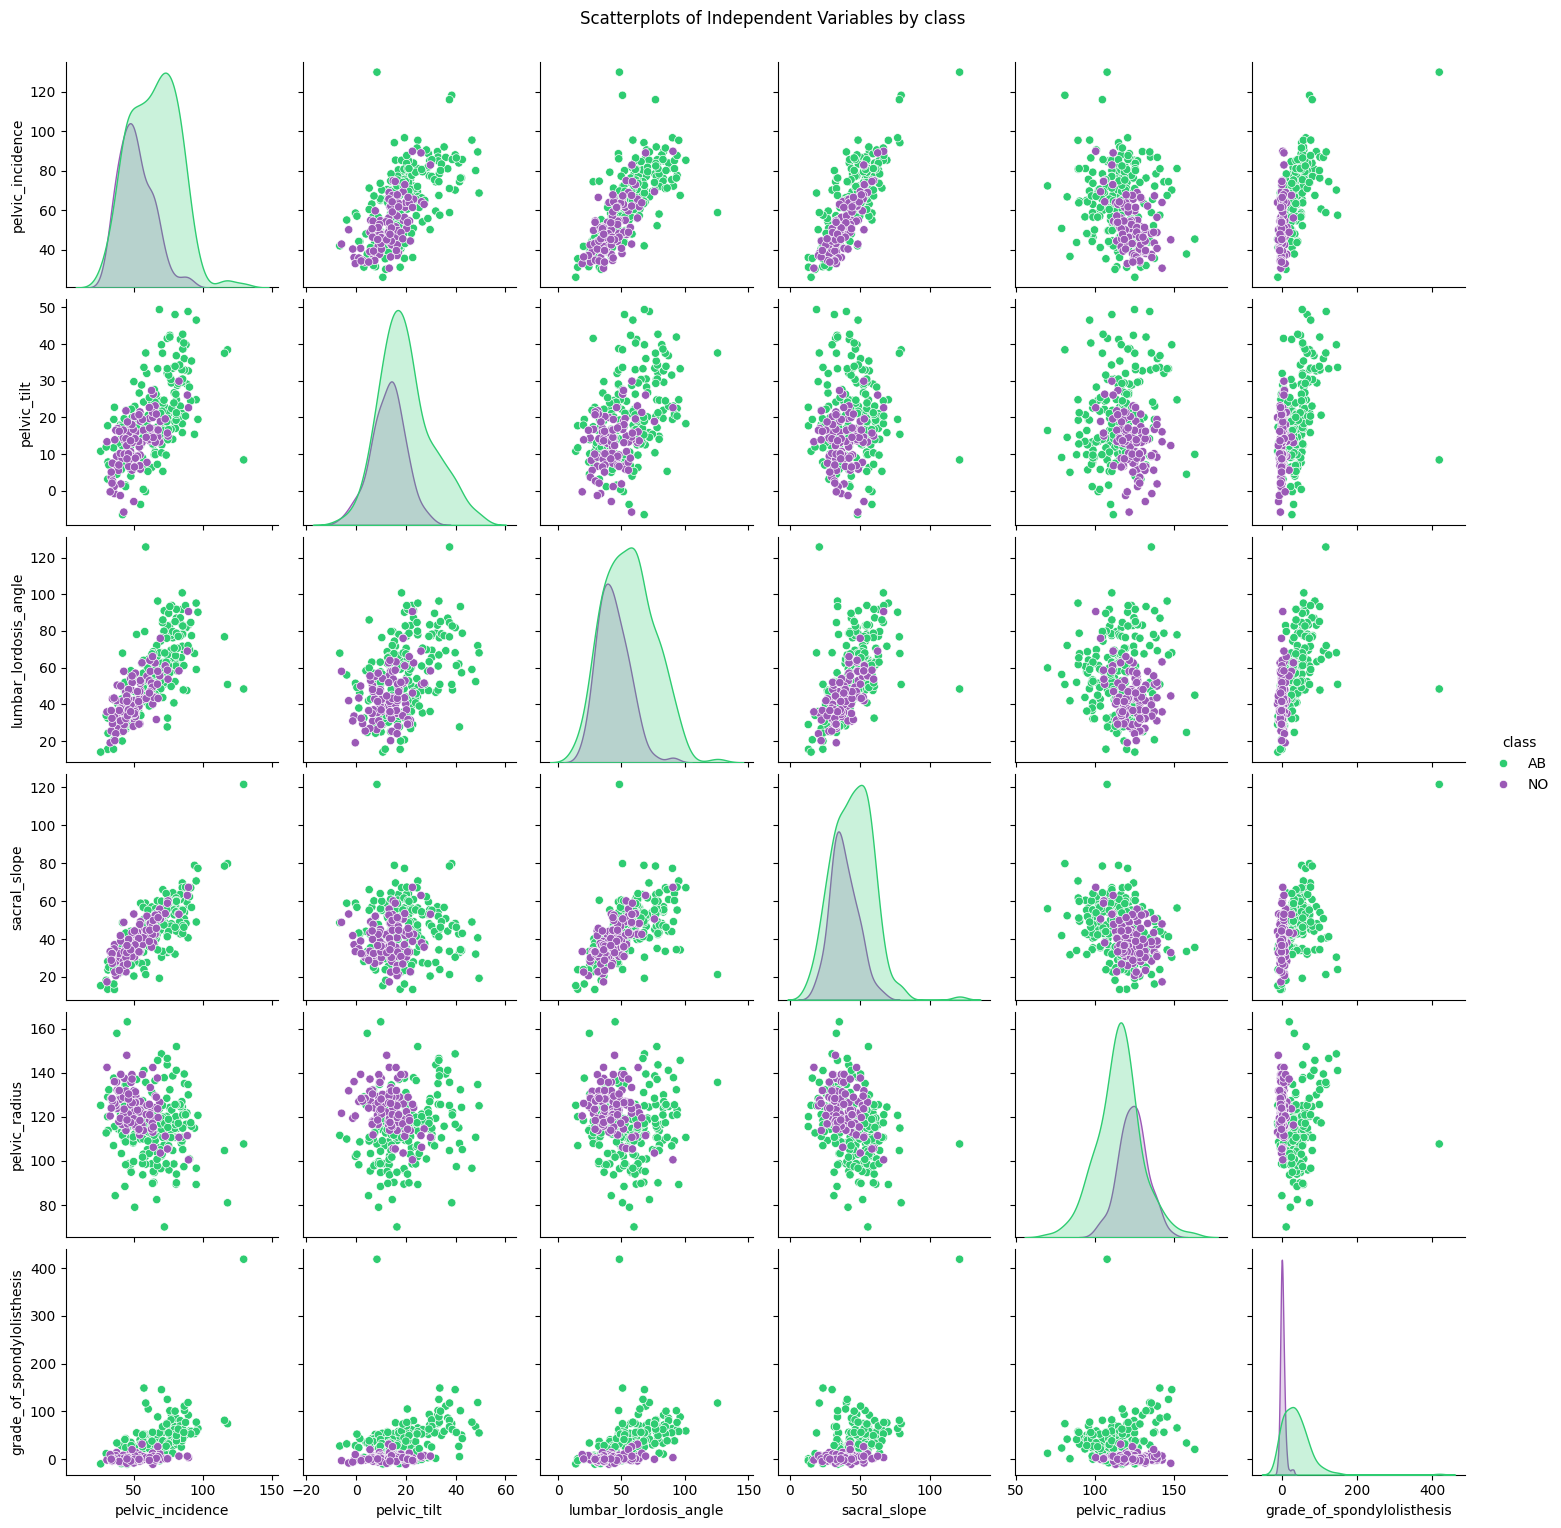

In [4]:
independent_vars = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis']
sns.pairplot(df, vars=independent_vars, hue='class', palette=["#2ecc71", "#9b59b6"])
plt.suptitle("Scatterplots of Independent Variables by class", y=1.02)
plt.show()


#### 1(b)ii. Boxplots

/var/folders/90/fb703g9j28x_mdt7qbbqyjh80000gn/T/ipykernel_66176/3218027139.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=attribute, data=df, palette=["#2ecc71", "#9b59b6"])
/var/folders/90/fb703g9j28x_mdt7qbbqyjh80000gn/T/ipykernel_66176/3218027139.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=attribute, data=df, palette=["#2ecc71", "#9b59b6"])
/var/folders/90/fb703g9j28x_mdt7qbbqyjh80000gn/T/ipykernel_66176/3218027139.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=attribute, data=df, 

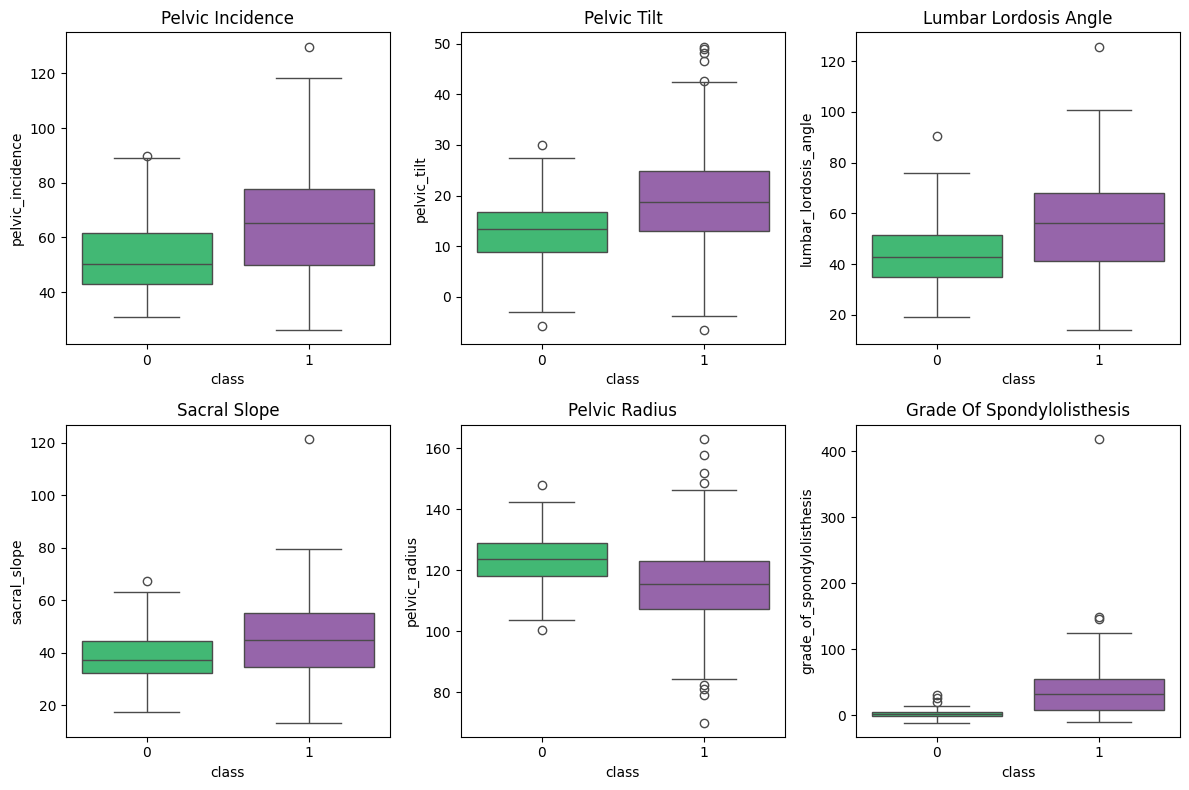

In [5]:
attributes = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis']
df['class'].replace(['AB','NO'],[1,0],inplace=True)
plt.figure(figsize=(12, 8))

for i, attribute in enumerate(attributes, start=1):
    plt.subplot(2, 3, i)  
    sns.boxplot(x='class', y=attribute, data=df, palette=["#2ecc71", "#9b59b6"])
    plt.title(attribute.replace('_', ' ').title())


plt.tight_layout()
plt.show()



#### 1(b)iii. Split Data Set
#### Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.


In [6]:
class_0 = df[df['class'] == 0]
class_1 = df[df['class'] == 1]

class_0_train = class_0.iloc[:70]
class_1_train = class_1.iloc[:140]

training_data = pd.concat([class_0_train, class_1_train])
print(f"Shape of training data:{training_data.shape}")


class_0_test = class_0.iloc[70:]
class_1_test = class_1.iloc[140:]
test_data = pd.concat([class_0_test, class_1_test])

X_train = training_data.iloc[:, : len(independent_vars)]
X_test = test_data.iloc[:, : len(independent_vars)]
Y_train = np.array(training_data["class"]).reshape(
    210,
)
Y_test = np.array(test_data["class"]).reshape(
    100,
)
print(f"Shape of testing data:{test_data.shape}")


Shape of training data:(210, 7)
Shape of testing data:(100, 7)


### 1(c) Classification using KNN on Vertebral Column Dataset

### 1(c)i.Write code for k-nearest neighbors with euclidean metric

In [7]:
classifier = KNeighborsClassifier(n_neighbors = 5, p=2, metric='euclidean')
classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean')

### 1(c)ii. i.Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ 208,205,...,7,4,1 (in reverse order). You are welcome to use smaller increments of k. Which k* is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k=k*

In [8]:
X_train = training_data.drop('class', axis=1)
Y_train = training_data['class']
X_test = test_data.drop('class', axis=1)
Y_test = test_data['class']
min_error=float("inf")
preds=[]
train_errors = []
test_errors = []
best_accuracy = 0

k_values = list(range(1, 209,3))[::-1]  
best_k = k_values[0]
for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    neigh.fit(X_train, Y_train)
    preds.append(neigh.predict(X_test))
    train_error = 1 - neigh.score(X_train, Y_train)
    test_error = 1 - neigh.score(X_test, Y_test)
    train_errors.append(train_error)
    test_errors.append(test_error)
    if test_error<min_error:
        min_error=test_error
        best_k=k

print(f" for k_value= {best_k},testing error is minimum = {round(min_error,4)}")

 for k_value= 4,testing error is minimum = 0.06


Confusion Matrix:
[[25  5]
 [ 1 69]]
Minimum testing error = 0.06
True Positive Rate (Recall): 0.9857142857142858
True Negative Rate (Specificity): 0.8333333333333334
Precision: 0.9324324324324325
F1-Score: 0.9583333333333333


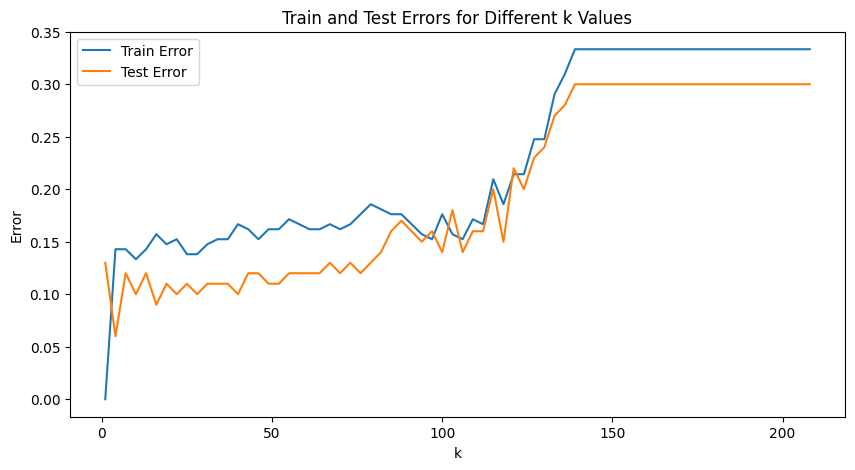

In [9]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, Y_train)
y_pred = knn_best.predict(X_test)

conf_matrix = confusion_matrix(Y_test, y_pred)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

TPR = TP / (TP + FN)
FPR = FP / (FP + TN) 
TNR = TN / (TN + FP) 
Precision = TP / (TP + FP)
F1_Score = 2 * (Precision * TPR) / (Precision + TPR)

print('Confusion Matrix:')
print(conf_matrix)
print(f"Minimum testing error = {round(min_error, 2)}")

print(f"True Positive Rate (Recall): {TPR}")
print(f"True Negative Rate (Specificity): {TNR}")
print(f"Precision: {Precision}")
print(f"F1-Score: {F1_Score}")

plt.figure(figsize=(10, 5))
plt.plot(k_values, train_errors, label='Train Error')
plt.plot(k_values, test_errors, label='Test Error')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Train and Test Errors for Different k Values')
plt.legend()
plt.show()


### 1(c)-iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ 10,20,30...,210 .Note: for each N, select your training set by choosing the first floor(N/3) rows of Class 0 and the first N-floor(N/3) rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k=1, increasing by 5. For example, if N=200, the optimal k is selected from 1,6,1,..,196. This plot is called a Learning Curve


In [10]:
def learning_curve(train_data_class_0, train_data_class_1, test_data, N_values):
    best_test_errors = []
    min_training_errors = []

    for N in N_values:
        N_class_0 = floor(N / 3)
        N_class_1 = N - N_class_0
        training_subset = pd.concat([train_data_class_0.iloc[:N_class_0], train_data_class_1.iloc[:N_class_1]])
        
        X_train_subset = training_subset.drop('class', axis=1)
        y_train_subset = training_subset['class']
        X_test = test_data.drop('class', axis=1)
        Y_test = test_data['class']
        
        best_test_error = float("inf")
        min_training_error = float("inf")
        best_k = 0
        
        k_range = list(range(1, N, 5))
        for k in k_range:
            knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
            knn.fit(X_train_subset, y_train_subset)
            
            Y_pred_test = knn.predict(X_test)
            test_error = 1 - accuracy_score(Y_test, Y_pred_test)
            
            Y_pred_train = knn.predict(X_train_subset)
            training_error = 1 - accuracy_score(y_train_subset, Y_pred_train)
            
            if test_error < best_test_error:
                best_test_error = round(test_error, 4)
                min_training_error = round(training_error, 4)
                best_k = k
        
        best_test_errors.append(best_test_error)
        min_training_errors.append(min_training_error)

    return best_test_errors, min_training_errors, best_k

N_values = list(range(10, 211, 10))

best_test_errors, min_training_errors, best_k_value = learning_curve(class_0_train, class_1_train, test_data, N_values)
min_training_error_euclidean=min(min_training_errors)
print(f"K values and corresponding test errors for Euclidean distance:")
print(f"Optimal K value = {best_k_value}")
print(f"Error rate corresponding to optimal k = {round(min(best_test_errors), 4)}")
print(f"Minimum training error across all N = {min_training_error_euclidean}")



K values and corresponding test errors for Euclidean distance:
Optimal K value = 6
Error rate corresponding to optimal k = 0.08
Minimum training error across all N = 0.0


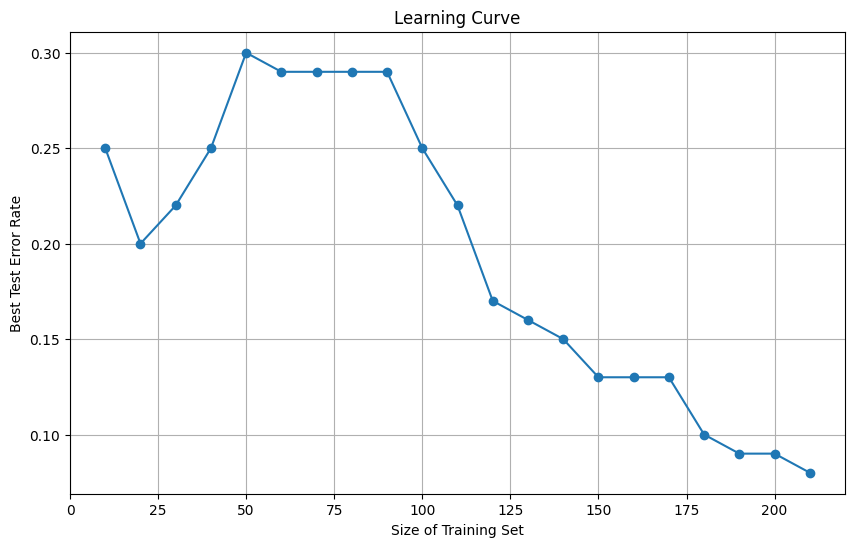

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(N_values, best_test_errors, marker='o')
plt.xlabel('Size of Training Set')
plt.ylabel('Best Test Error Rate')
plt.title('Learning Curve')
plt.grid(True)
plt.show()


### 1(d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k=k*) in a table. Use all of your training data and select the best when 1,6,11,...,196 .

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [12]:
def knn_errors_for_metric(X_train, Y_train, X_test, Y_test, k_values, metric, **metric_params):
    errors = {} 
    training_errors = {}

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, **metric_params)
        knn.fit(X_train, Y_train)
        test_error = 1 - knn.score(X_test, Y_test)
        training_error = 1 - knn.score(X_train, Y_train) 
        errors[k] = round(test_error, 4)
        training_errors[k] = round(training_error, 4) 

    return errors, training_errors


k_values = list(range(1, 200, 5))
manhattan_errors, manhattan_training_errors = knn_errors_for_metric(X_train, Y_train, X_test, Y_test, k_values, 'minkowski', p=1)

min_test_error = min(manhattan_errors.values())
min_training_error_manhattan = min(manhattan_training_errors.values()) 

best_ks_for_min_test_error = {k: error for k, error in manhattan_errors.items() if error == min_test_error}
best_ks_for_min_training_error = {k: error for k, error in manhattan_training_errors.items() if error == min_training_error_manhattan} 

results_df_test = pd.DataFrame(list(best_ks_for_min_test_error.items()), columns=['k value', 'Test error'])
results_df_train = pd.DataFrame(list(best_ks_for_min_training_error.items()), columns=['k value', 'Training error']) 

print("\nK values and corresponding training errors for Manhattan distance when p=1:",min_training_error_manhattan)

print(f"K values and corresponding test errors for Manhattan distance when p=1:")
print(results_df_test.to_string(index=False))




K values and corresponding training errors for Manhattan distance when p=1: 0.0
K values and corresponding test errors for Manhattan distance when p=1:
 k value  Test error
       6        0.11
      11        0.11
      26        0.11


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [13]:
def calculate_errors(X_train, Y_train, X_test, Y_test, k, metric, **metric_params):
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric, **metric_params)
    knn.fit(X_train, Y_train)
    test_error = 1 - knn.score(X_test, Y_test)
    training_error = 1 - knn.score(X_train, Y_train) 
    return round(training_error, 4), round(test_error, 4)

best_k_manhattan = 6  

log_p_values = np.arange(0.1, 1.1, 0.1)
results = []
min_training_error_minkowski = float('inf')  

for log_p in log_p_values:
    p = 10**log_p
    training_error, test_error = calculate_errors(X_train, Y_train, X_test, Y_test, best_k_manhattan, 'minkowski', p=p)
    
    if training_error < min_training_error_minkowski:
        min_training_error_minkowski = training_error
    
    results.append([
        p, 
        round(log_p, 1), 
        test_error 
    ])

headers = ['p', 'log10(p)', 'Test Error']

print(tabulate(results, headers=headers, floatfmt=".4f"))

print(f"\nMinimum Training Error for Minkowski: {min_training_error_minkowski:.4f}")


      p    log10(p)    Test Error
-------  ----------  ------------
 1.2589      0.1000        0.0900
 1.5849      0.2000        0.0900
 1.9953      0.3000        0.0800
 2.5119      0.4000        0.0800
 3.1623      0.5000        0.0800
 3.9811      0.6000        0.0600
 5.0119      0.7000        0.0700
 6.3096      0.8000        0.0800
 7.9433      0.9000        0.0900
10.0000      1.0000        0.0900

Minimum Training Error for Minkowski: 0.1333


#### Best log10(p)

In [14]:
results_df = pd.DataFrame(results, columns=headers)

min_error_index = results_df['Test Error'].idxmin()
min_error_row = results_df.iloc[min_error_index]

print("Best log10(p) and corresponding Test Error:")
data = [
    ['p', min_error_row['p']],
    ['log10(p)', min_error_row['log10(p)']],
    ['Test Error', min_error_row['Test Error']]
]

print(tabulate(data, headers='firstrow', tablefmt='grid'))

print(f"\nMinimum Training Error for Minkowski: {min_training_error_minkowski:.4f}")


Best log10(p) and corresponding Test Error:
+------------+----------------------+
| p          |   3.9810717055349722 |
+============+======================+
| log10(p)   |                 0.6  |
+------------+----------------------+
| Test Error |                 0.06 |
+------------+----------------------+

Minimum Training Error for Minkowski: 0.1333


##### C. Chebyshev Distance With p -> infinity.

In [15]:
def find_optimal_k_and_errors(X_train, Y_train, X_test, Y_test, k_values):
    best_k = -1
    best_test_error = float('inf')
    min_training_error = float('inf')
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
        knn.fit(X_train, Y_train)
        
        Y_pred_test = knn.predict(X_test)
        test_error = 1 - accuracy_score(Y_test, Y_pred_test)

        Y_pred_train = knn.predict(X_train)
        training_error = 1 - accuracy_score(Y_train, Y_pred_train)

        if test_error < best_test_error:
            best_test_error = test_error
            best_k = k
            
        if training_error < min_training_error:
            min_training_error = training_error
            
    return best_k, best_test_error, min_training_error

k_values = list(range(1, 197, 5))

optimal_k, test_error, min_training_error_chebyshev = find_optimal_k_and_errors(X_train, Y_train, X_test, Y_test, k_values)

print(f"Optimal k - Chebyshev Distance: {optimal_k}")
print(f"Test Error - Chebyshev Distance: {test_error:.2f}")
print(f"Minimum Training Error for Chebyshev Distance(p->infinite): {min_training_error_chebyshev:.4f}")


Optimal k - Chebyshev Distance: 16
Test Error - Chebyshev Distance: 0.08
Minimum Training Error for Chebyshev Distance(p->infinite): 0.0000


### 1(d) ii. Mahalanobis distance

In [16]:
def find_optimal_k_mahalanobis_with_training_error(X_train, Y_train, X_test, Y_test, k_values):
    cov_matrix = np.cov(X_train, rowvar=False)
    VI = inv(cov_matrix)  
    best_k = -1
    best_test_error = float('inf')
    min_training_error = float('inf') 
    errors = {}
    training_errors = {}  
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute', metric='mahalanobis', metric_params={'VI': VI})
        knn.fit(X_train, Y_train)
        
        Y_pred_test = knn.predict(X_test)
        test_error = 1 - accuracy_score(Y_test, Y_pred_test)
        
        Y_pred_train = knn.predict(X_train)
        training_error = 1 - accuracy_score(Y_train, Y_pred_train)
        
        errors[k] = test_error
        training_errors[k] = training_error  
        if test_error < best_test_error:
            best_test_error = test_error
            best_k = k
            
        if training_error < min_training_error:
            min_training_error = training_error
    
    optimal_ks = [k for k, error in errors.items() if error == best_test_error]
    
    return optimal_ks, best_test_error, min_training_error, errors, training_errors

k_values = list(range(1, 197, 5))

optimal_ks, best_test_error, min_training_error_mahalanobis, test_errors, training_errors = find_optimal_k_mahalanobis_with_training_error(X_train, Y_train, X_test, Y_test, k_values)

results_df = pd.DataFrame({'k value': optimal_ks, 'Test error': [best_test_error] * len(optimal_ks)})

print(f"K values and corresponding test erorrs for Mahalanobis distance:")
print(results_df.to_string(index=False))

print(f"Minimum Training Error for Mahalanobis Distance: {min_training_error_mahalanobis:.4f}")



K values and corresponding test erorrs for Mahalanobis distance:
 k value  Test error
       1        0.17
       6        0.17
Minimum Training Error for Mahalanobis Distance: 0.0000


### (e) Weighted Decision: The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k in {1,6,11,...,196}.

In [17]:
def calculate_weighted_errors_and_find_mins(X_train, Y_train, X_test, Y_test, k_values, metric):
    errors = {}
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric=metric)
        knn.fit(X_train, Y_train)
        
        Y_pred_test = knn.predict(X_test)
        test_error = 1 - accuracy_score(Y_test, Y_pred_test)
        
        Y_pred_train = knn.predict(X_train)
        training_error = 1 - accuracy_score(Y_train, Y_pred_train)
        
        errors[k] = {'Test Error': round(test_error, 4), 'Training Error': round(training_error, 4)}
        
    min_test_error = min(error['Test Error'] for error in errors.values())
    min_training_error = min(error['Training Error'] for error in errors.values())
    
    optimal_ks = [k for k, error in errors.items() if error['Test Error'] == min_test_error]
    return optimal_ks, errors, min_training_error

k_values = list(range(1, 197, 5))
metrics = ['euclidean', 'manhattan', 'chebyshev']

for metric in metrics:
    optimal_ks, errors, min_training_error_weighted_distance= calculate_weighted_errors_and_find_mins(X_train, Y_train, X_test, Y_test, k_values, metric)
    
    data = {'k value': optimal_ks,
            'Test error': [errors[k]['Test Error'] for k in optimal_ks]
            }
    df = pd.DataFrame(data)
    
    print(f"{metric.capitalize()} Distance Errors with the same minimum test error:")
    print(df.to_string(index=False))
    print(f"Minimum Training Error for {metric.capitalize()} distance: {min_training_error_weighted_distance:.4f}\n")


Euclidean Distance Errors with the same minimum test error:
 k value  Test error
       6         0.1
Minimum Training Error for Euclidean distance: 0.0000

Manhattan Distance Errors with the same minimum test error:
 k value  Test error
      26         0.1
Minimum Training Error for Manhattan distance: 0.0000

Chebyshev Distance Errors with the same minimum test error:
 k value  Test error
      16        0.11
      31        0.11
      36        0.11
      41        0.11
      61        0.11
Minimum Training Error for Chebyshev distance: 0.0000



### (f) Training Error Rate

In [18]:
weighted=[]
for metric in metrics:
    optimal_ks, errors, min_training_error_weighted_distance= calculate_weighted_errors_and_find_mins(X_train, Y_train, X_test, Y_test, k_values, metric)
    
    data = {'k value': optimal_ks,
            'Test error': [errors[k]['Test Error'] for k in optimal_ks]
            }
    df = pd.DataFrame(data)
    weighted.append(min_training_error_weighted_distance)

metrics_errors = [
    {"Metric": "Euclidean", "Min Training Error": min_training_error_euclidean},
    {"Metric": "Manhattan", "Min Training Error": min_training_error_manhattan},
    {"Metric": "Minkowski", "Min Training Error": min_training_error_minkowski},
    {"Metric": "Chebyshev", "Min Training Error": min_training_error_chebyshev},
    {"Metric": "Weighted Euclidean", "Min Training Error": weighted[0]},
     {"Metric": "Weighted Manhattan", "Min Training Error": weighted[1]},
      {"Metric": "Weighted Chebyshev", "Min Training Error": weighted[2]},
    
]


errors_df = pd.DataFrame(metrics_errors)


print(tabulate(errors_df, headers='keys', tablefmt='grid', showindex=False, floatfmt=".4f"))



+--------------------+----------------------+
| Metric             |   Min Training Error |
+====================+======================+
| Euclidean          |               0.0000 |
+--------------------+----------------------+
| Manhattan          |               0.0000 |
+--------------------+----------------------+
| Minkowski          |               0.1333 |
+--------------------+----------------------+
| Chebyshev          |               0.0000 |
+--------------------+----------------------+
| Weighted Euclidean |               0.0000 |
+--------------------+----------------------+
| Weighted Manhattan |               0.0000 |
+--------------------+----------------------+
| Weighted Chebyshev |               0.0000 |
+--------------------+----------------------+



The lowest training error rate that I achieved in this homework is 0.0000